In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle("/scratch/scratch8/madhurjindal/ACS-QG-Scratch/Datasets/processed/SQuAD1.1-Zhou/squad_ans_clue_style_info.pkl")

In [3]:
data = pd.DataFrame(data)

In [4]:
# Get the 3rd element of the tuple in data['clue_chunk']
def get_clue_chunk_3rd(data):
    try:
        return " ".join(data[2])
    except:
        return ""



In [5]:
data['clue_text'] = list(map(get_clue_chunk_3rd, data['clue_chunk']))

In [6]:
data

,question,ans_sent,answer_text,question_type,answer_pos_tag,answer_ner_tag,answer_length,clue_pos_tag,clue_ner_tag,clue_answer_dep_path_len,clue_length,clue_chunk,clue_text
0,To whom did the Virgin Mary allegedly appear i...,"It is a replica of the grotto at Lourdes, Fran...",Saint Bernadette Soubirous,"(Who, 1)",NP,PERSON,3,NP,PERSON,5,3,"(PERSON, NP, [the, Virgin, Mary], 12, 14)",the Virgin Mary
1,What is in front of the Notre Dame Main Building?,Immediately in front of the Main Building and ...,a copper statue of Christ,"(What, 0)",UNK,UNK,5,NP,UNK,4,5,"(UNK, NP, [front, of, the, Main, Building], 2, 6)",front of the Main Building
2,The Basilica of the Sacred heart at Notre Dame...,Next to the Main Building is the Basilica of t...,the Main Building,"(Which, 6)",NP,FAC,3,NP,LOC,6,6,"(LOC, NP, [the, Basilica, of, the, Sacred, Hea...",the Basilica of the Sacred Heart
3,What is the Grotto at Notre Dame?,"Immediately behind the basilica is the Grotto,...",a Marian place of prayer and reflection,"(What, 0)",NP,UNK,7,NNP,ORG,2,1,"(ORG, NNP, [Grotto], 6, 6)",Grotto
4,What sits on top of the Main Building at Notre...,Atop the Main Building's gold dome is a golden...,a golden statue of the Virgin Mary,"(What, 0)",NP,UNK,7,NNP,FAC,5,1,"(FAC, NNP, [Main], 2, 2)",Main
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86630,In what US state did Kathmandu first establish...,KMC's first international relationship was est...,Oregon,"(What, 0)",NNP,GPE,1,JJ,UNK,7,1,"(UNK, JJ, [international], 3, 3)",international
86631,What was Yangon previously known as?,This activity has been further enhanced by est...,Rangoon,"(What, 0)",NNP,LOC,1,NNP,GPE,1,1,"(GPE, NNP, [Yangon], 25, 25)",Yangon
86632,With what Belorussian city does Kathmandu have...,This activity has been further enhanced by est...,Minsk,"(What, 0)",NNP,GPE,1,NNP,GPE,6,1,"(GPE, NNP, [City], 16, 16)",City
86633,In what year did Kathmandu create its initial ...,KMC's first international relationship was est...,1975,"(What, 0)",CD,DATE,1,JJ,UNK,4,1,"(UNK, JJ, [international], 3, 3)",international


In [7]:
data.to_csv("/scratch/scratch8/madhurjindal/ACS-QG-Scratch/Datasets/processed/SQuAD1.1-Zhou/squad_ans_clue_style_info.tsv", sep="\t", index=False)

# Question Type Demographics

In [8]:
data['question_type'].value_counts()

(What, 0)       49991
(Who, 1)         9382
(How, 2)         9197
(Which, 6)       6035
(When, 4)        5657
(Where, 3)       3673
(Why, 5)         1213
(Boolean, 7)      982
(Other, 8)        505
Name: question_type, dtype: int64

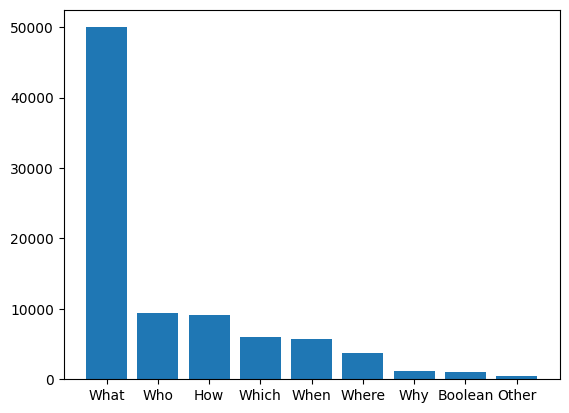

In [9]:
plt.bar(list(map(lambda x: x[0],data['question_type'].value_counts().index.tolist())), data['question_type'].value_counts())
plt.show()

# Answer POS Tag

In [10]:
data['answer_pos_tag'].nunique()

45

In [11]:
100*(data['answer_pos_tag'].value_counts()/data['answer_pos_tag'].shape[0])

UNK      31.761990
NP       29.059849
CD       11.037110
NNP       9.021758
NN        4.941421
JJ        3.358920
NNS       2.348935
VP        1.620592
PP        1.326254
NML       1.171582
QP        0.958042
S         0.649853
ADJP      0.636002
NNPS      0.483638
RB        0.235471
SBAR      0.233162
FW        0.226237
VBN       0.219311
ADVP      0.122352
VBG       0.113118
JJR       0.095804
VB        0.075027
VBD       0.055405
DT        0.038091
JJS       0.038091
VBP       0.025394
VBZ       0.024240
HYPH      0.018468
,         0.016160
-RRB-     0.016160
PDT       0.012697
IN        0.011543
UCP       0.010388
RBR       0.006926
SYM       0.005771
UH        0.004617
''        0.003463
PRP       0.003463
-LRB-     0.003463
.         0.002309
$         0.002309
LS        0.001154
POS       0.001154
RP        0.001154
:         0.001154
Name: answer_pos_tag, dtype: float64

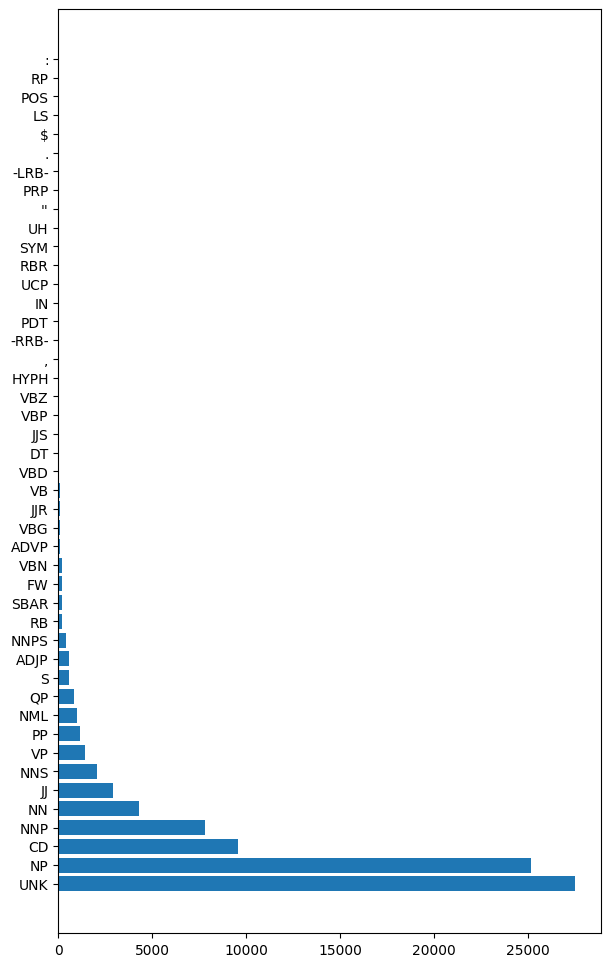

In [12]:
plt.figure(figsize=(7,12))
plt.barh(data['answer_pos_tag'].value_counts().index.tolist(), data['answer_pos_tag'].value_counts())
plt.show()

In [13]:
data[data['answer_pos_tag'] == ","]

,question,ans_sent,answer_text,question_type,answer_pos_tag,answer_ner_tag,answer_length,clue_pos_tag,clue_ner_tag,clue_answer_dep_path_len,clue_length,clue_chunk,clue_text
289,When did Beyonce take a hiatus in her career a...,Her marriage to rapper Jay Z and portrayal of ...,2010,"(When, 4)",",",DATE,1,CD,UNK,4,1,"(UNK, CD, [six], 44, 44)",six
797,When did she appear on the cover of GQ?,"In January 2013, GQ placed her on its cover, f...",2013,"(When, 4)",",",DATE,1,NNP,UNK,4,1,"(UNK, NNP, [GQ], 4, 4)",GQ
1105,In what year did many cities in Montana set he...,Many Montana cities set heat records during Ju...,2007,"(What, 0)",",",DATE,1,NP,UNK,5,2,"(UNK, NP, [heat, records], 4, 5)",heat records
9866,The newer version of the Wayback Machine inclu...,"In March 2011, it was said on the Wayback Mach...",2010,"(What, 0)",",",DATE,1,NML,WORK_OF_ART,7,2,"(WORK_OF_ART, NML, [Wayback, Machine], 9, 10)",Wayback Machine
12694,When was Mick Cornett first elected?,"Mick Cornett serves as Mayor, having first bee...",2004,"(When, 4)",",",DATE,1,NP,PERSON,5,2,"(PERSON, NP, [Mick, Cornett], 0, 1)",Mick Cornett
14870,What year did Hubway launch?,The bikeshare program called Hubway launched i...,2011,"(What, 0)",",",DATE,1,NNP,GPE,6,1,"(GPE, NNP, [Hubway], 4, 4)",Hubway
28419,When did Russia's United Shipbuilding Corporat...,"Speaking in St. Petersburg, Russia on 30 June ...",2016,"(When, 4)",",",DATE,1,NP,UNK,8,5,"(UNK, NP, [Russia, 's, United, Shipbuilding, C...",Russia 's United Shipbuilding Corporation
44936,In what year did the Korean church celebrate t...,All major seminaries associated with each deno...,2007,"(What, 0)",",",DATE,1,NP,UNK,4,3,"(UNK, NP, [the, 100th, class], 41, 43)",the 100th class
48406,When did Travel + Leisure list Yale as one of ...,"In 2011, Travel+Leisure listed the Yale campus...",2011,"(When, 4)",",",DATE,1,NNP,ORG,4,1,"(ORG, NNP, [Yale], 6, 6)",Yale
56287,What year saw the crash of the Miami housing m...,"In 2007, however, the housing market crashed c...",2007,"(What, 0)",",",DATE,1,NP,UNK,4,3,"(UNK, NP, [the, housing, market], 5, 7)",the housing market


In [14]:
data[data['answer_pos_tag'] == "."]

,question,ans_sent,answer_text,question_type,answer_pos_tag,answer_ner_tag,answer_length,clue_pos_tag,clue_ner_tag,clue_answer_dep_path_len,clue_length,clue_chunk,clue_text
32295,When was the Water Tribunal declared a cultura...,"In its long history, Valencia has acquired man...",2009,"(When, 4)",.,DATE,1,NP,ORG,4,3,"(ORG, NP, [the, Water, Tribunal], 40, 42)",the Water Tribunal
55102,Temperatures over 100 degrees will typically b...,The weaker influence of the Atlantic Ocean als...,.,"(What, 0)",.,UNK,1,NP,UNK,3,4,"(UNK, NP, [temperatures, in, the, Piedmont], 1...",temperatures in the Piedmont


In [15]:
data[data['answer_pos_tag'] == ":"]

,question,ans_sent,answer_text,question_type,answer_pos_tag,answer_ner_tag,answer_length,clue_pos_tag,clue_ner_tag,clue_answer_dep_path_len,clue_length,clue_chunk,clue_text
78461,"What Proto-Indo-European term means ""skillful ...",The Middle Iranian ērān and aryān are oblique ...,*ar-yo-,"(What, 0)",:,UNK,1,NP,UNK,3,2,"(UNK, NP, [skillful, assembler], 52, 53)",skillful assembler


In [16]:
data[data['answer_pos_tag'] == '-LRB-']

,question,ans_sent,answer_text,question_type,answer_pos_tag,answer_ner_tag,answer_length,clue_pos_tag,clue_ner_tag,clue_answer_dep_path_len,clue_length,clue_chunk,clue_text
80822,What did the old letters ⟨і⟩ and ⟨ѵ⟩ become?,Older letters of the Russian alphabet include ...,⟨и⟩,"(What, 0)",-LRB-,UNK,1,NP,UNK,4,3,"(UNK, NP, [⟨і⟩, and, ⟨ѵ⟩], 19, 21)",⟨і⟩ and ⟨ѵ⟩
80823,What did the old letter ⟨ѳ⟩ become?,Older letters of the Russian alphabet include ...,⟨ф⟩,"(What, 0)",-LRB-,UNK,1,-LRB-,UNK,3,1,"(UNK, -LRB-, [⟨ѳ⟩], 32, 32)",⟨ѳ⟩
80825,What did the old letter ⟨ѭ⟩ become?,Older letters of the Russian alphabet include ...,⟨ю⟩,"(What, 0)",-LRB-,UNK,1,FW,UNK,4,1,"(UNK, FW, [⟨ѭ⟩], 52, 52)",⟨ѭ⟩


In [17]:
data[data['answer_pos_tag'] == '$']

,question,ans_sent,answer_text,question_type,answer_pos_tag,answer_ner_tag,answer_length,clue_pos_tag,clue_ner_tag,clue_answer_dep_path_len,clue_length,clue_chunk,clue_text
46498,What is the daily cost for most drivers to ope...,"With a few exceptions, motorists are required ...",£10,"(What, 0)",$,UNK,1,NN,UNK,6,1,"(UNK, NN, [zone], 18, 18)",zone
83483,By what vote did the Supreme Court determine i...,"In Engel v. Vitale, 370 U.S. 421 (1962), the C...",6-1,"(What, 0)",$,UNK,1,VP,UNK,8,5,"(UNK, VP, [compose, an, official, school, pray...",compose an official school prayer


# ANSWER NER TAG

In [18]:
curr_col = 'answer_ner_tag'

In [19]:
data[curr_col].nunique()

19

In [20]:
100*(data[curr_col].value_counts()/data[curr_col].shape[0])

UNK            65.853293
DATE            8.898251
ORG             5.706701
PERSON          5.637444
CARDINAL        4.868702
GPE             3.834478
NORP            1.382813
LOC             0.694869
WORK_OF_ART     0.651007
FAC             0.592139
QUANTITY        0.458244
PERCENT         0.270099
EVENT           0.265482
ORDINAL         0.192763
PRODUCT         0.171986
MONEY           0.169677
LAW             0.145438
TIME            0.126969
LANGUAGE        0.079644
Name: answer_ner_tag, dtype: float64

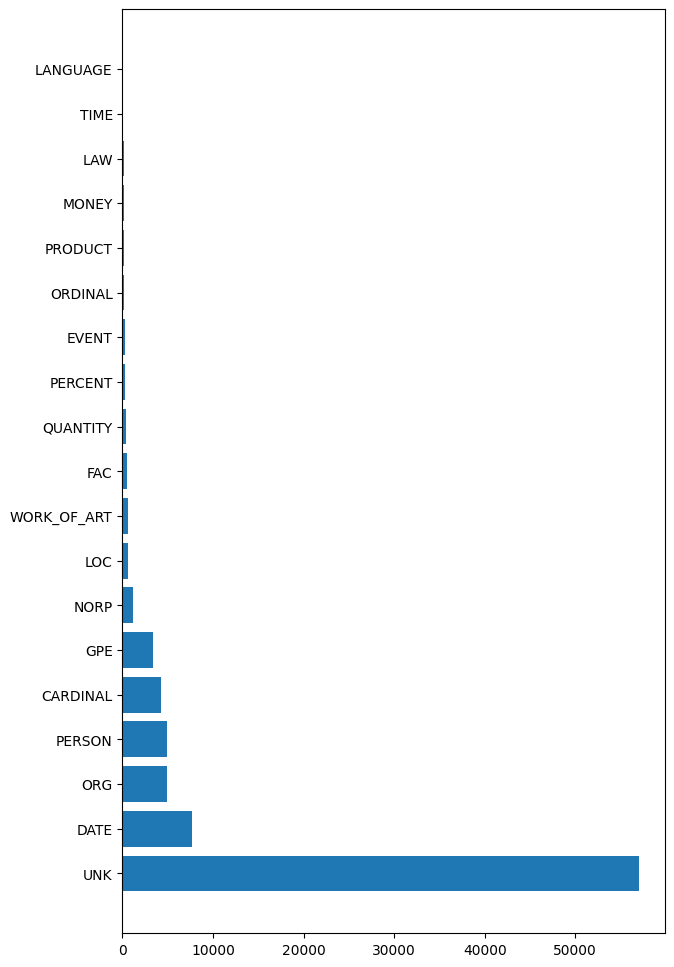

In [21]:
plt.figure(figsize=(7,12))
plt.barh(data[curr_col].value_counts().index.tolist(), data[curr_col].value_counts())
plt.show()

# ANSWER LENGTH

In [22]:
data['answer_length'].value_counts()

1     29681
2     22184
3     13067
4      6366
5      4013
6      2518
7      1839
8      1368
9       969
10      778
11      634
12      535
13      434
14      384
15      342
16      239
17      234
18      217
19      157
20      148
21      128
22      117
23       92
24       61
25       54
26       33
27       22
28       10
30        6
29        3
43        1
31        1
Name: answer_length, dtype: int64

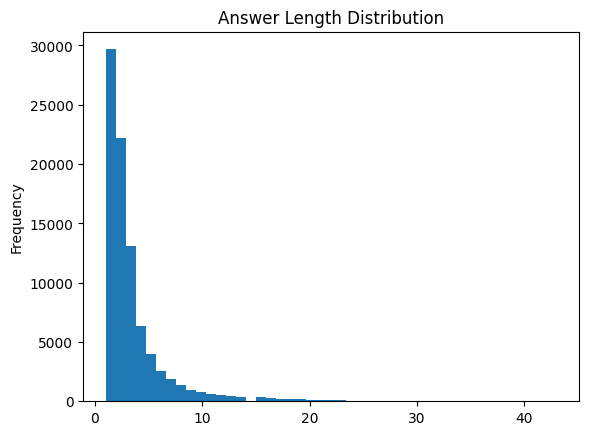

In [65]:
data['answer_length'].plot(kind='hist', bins=45, xlabel='Answer Length', ylabel='Frequency', title='Answer Length Distribution')
plt.show()

# Clue Length

In [24]:
data['clue_length'].value_counts()

1     47663
2     11921
3     11147
4      5395
0      3205
5      2987
6      1699
7       993
8       585
9       387
10      218
11      127
12       95
13       57
14       55
15       32
16       18
17       14
18        9
19        6
20        6
29        2
24        2
28        2
30        2
21        2
37        1
27        1
26        1
23        1
22        1
25        1
Name: clue_length, dtype: int64

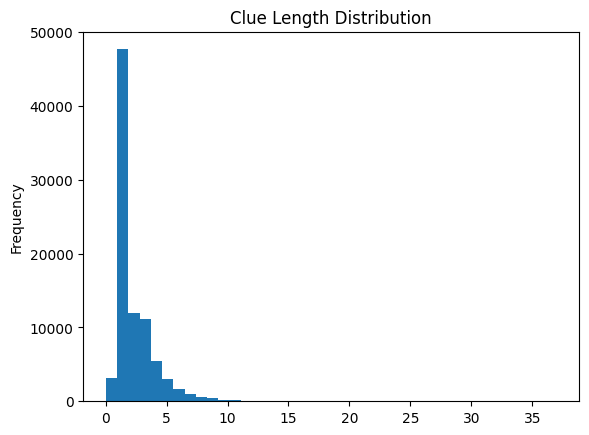

In [64]:
data['clue_length'].plot(kind='hist', bins=40, title='Clue Length Distribution', xlabel='clue length', ylabel='frequency')
plt.show()

In [26]:
data[data['clue_length'] == 0]

,question,ans_sent,answer_text,question_type,answer_pos_tag,answer_ner_tag,answer_length,clue_pos_tag,clue_ner_tag,clue_answer_dep_path_len,clue_length,clue_chunk,clue_text
66,Thomas Stritch was an editor of which publican...,The Review of Politics was founded in 1939 by ...,Review of Politics,"(Which, 6)",UNK,UNK,3,UNK,UNK,-1,0,None,
105,Where did Notre Dame students and the KKK have...,The Klan decided to have a week-long Klavern i...,South Bend,"(Where, 3)",NP,GPE,2,UNK,UNK,-1,0,None,
137,What structure is found on the location of the...,The current Basilica of the Sacred Heart is lo...,Basilica of the Sacred Heart,"(What, 0)",UNK,UNK,5,UNK,UNK,-1,0,None,
205,In what year had the library at Notre Dame rea...,By 1879 it had grown to ten thousand volumes t...,1879,"(What, 0)",CD,DATE,1,UNK,UNK,-1,0,None,
244,On what day do Notre Dame home football games ...,This tradition involves the drum line of the B...,Saturday,"(What, 0)",NNP,DATE,1,UNK,UNK,-1,0,None,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86378,On what date was Maru Satal destroyed?,The structure collapsed during the major earth...,25 April 2015,"(What, 0)",NP,DATE,3,UNK,UNK,-1,0,None,
86442,"Other than trade, what was the traditional bas...",This geography helped form a society based on ...,agriculture,"(What, 0)",NN,UNK,1,UNK,UNK,-1,0,None,
86455,What Nepalese mountains are claimed to attract...,The high level of tourism is attributed to the...,Himalayas,"(What, 0)",NNPS,ORG,1,UNK,UNK,-1,0,None,
86572,What meat is very rarely eaten in Kathmandu?,Consumption of beef is very uncommon and consi...,beef,"(What, 0)",NN,UNK,1,UNK,UNK,-1,0,None,


In [27]:
ind = 0
print(data[data['clue_length'] == 0].iloc[ind]['ans_sent'])
print(data[data['clue_length'] == 0].iloc[ind]['question'])
print(data[data['clue_length'] == 0].iloc[ind]['answer_text'])

The Review of Politics was founded in 1939 by Gurian, modeled after German Catholic journals.
Thomas Stritch was an editor of which publican from Notre Dame?
Review of Politics


In [28]:
ind = -1
print(data[data['clue_length'] == 0].iloc[ind]['ans_sent'])
print(data[data['clue_length'] == 0].iloc[ind]['question'])
print(data[data['clue_length'] == 0].iloc[ind]['answer_text'])

It is practiced by Kirat people.
Who follows the Kirant Mudhum faith?
Kirat people


In [29]:
ind = 100
print(data[data['clue_length'] == 0].iloc[ind]['ans_sent'])
print(data[data['clue_length'] == 0].iloc[ind]['question'])
print(data[data['clue_length'] == 0].iloc[ind]['answer_text'])

While the Ming dynasty traded horses with Tibet, it upheld a policy of outlawing border markets in the north, which Laird sees as an effort to punish the Mongols for their raids and to "drive them from the frontiers of China."
Who did Altan Khan make peace with?
the Ming dynasty


# Clue Answer Dependency Path Length

In [30]:
data['clue_answer_dep_path_len'].value_counts().sort_values(ascending=False)

4      15756
5      13904
3      12467
6      10053
2       8207
       ...  
86         1
89         1
85         1
127        1
74         1
Name: clue_answer_dep_path_len, Length: 92, dtype: int64

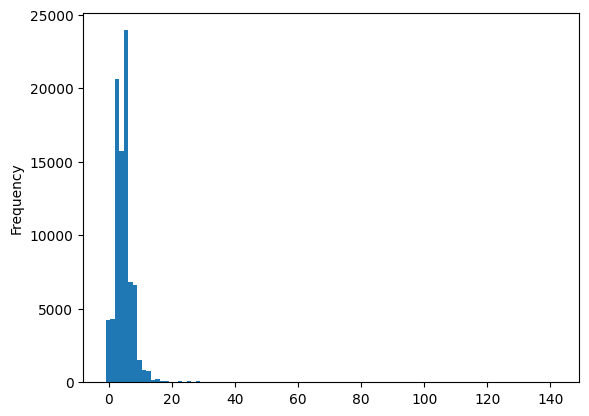

In [31]:
data['clue_answer_dep_path_len'].plot(kind='hist', bins=100)
plt.show()

In [32]:
data[data['clue_answer_dep_path_len'] == 0]

,question,ans_sent,answer_text,question_type,answer_pos_tag,answer_ner_tag,answer_length,clue_pos_tag,clue_ner_tag,clue_answer_dep_path_len,clue_length,clue_chunk,clue_text
79,How many dorms for males are on the Notre Dame...,Because of the religious affiliation of the un...,15,"(How, 2)",CD,CARDINAL,1,NNS,UNK,0,1,"(UNK, NNS, [dorms], 18, 18)",dorms
230,What is the Notre Dame fight song?,The band regularly plays the school's fight so...,Notre Dame Victory March,"(What, 0)",UNK,UNK,4,NML,UNK,0,2,"(UNK, NML, [Notre, Dame], 10, 11)",Notre Dame
340,At what age did Beyonce meet LaTavia Robertson?,"At age eight, Beyoncé and childhood friend Kel...",age eight,"(What, 0)",NP,DATE,2,NN,DATE,0,1,"(DATE, NN, [age], 1, 1)",age
410,What was the name of the final album of Destin...,"Released on November 15, 2004, in the US and p...",Destiny Fulfilled,"(What, 0)",NP,UNK,2,NNP,UNK,0,1,"(UNK, NNP, [Destiny], 20, 20)",Destiny
434,Who was Beyonce's duet with in ''Beautiful Lia...,"At the same time, B'Day was re-released with f...",Shakira,"(Who, 1)",NNP,PERSON,1,NML,PERSON,0,2,"(PERSON, NML, [Beautiful, Liar], 19, 20)",Beautiful Liar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86236,What allows people to hunt over the internet?,"When Internet hunting was introduced in 2005, ...",Internet hunting,"(What, 0)",NP,UNK,2,NN,UNK,0,1,"(UNK, NN, [Internet], 1, 1)",Internet
86394,Who won the war between the Licchavis and the ...,The Licchavis from the Indo-Gangetic plain mig...,Licchavis,"(Who, 1)",NNPS,PERSON,1,NNPS,PERSON,0,1,"(PERSON, NNPS, [Licchavis], 1, 1)",Licchavis
86503,What dynasty did Yaksha Malla belong to?,The priests who perform the services at this t...,Malla,"(What, 0)",NNP,PERSON,1,NNP,PERSON,0,1,"(PERSON, NNP, [Malla], 21, 21)",Malla
86541,Who was the penultimate king of Nepal?,"These museums include the Birendra museum, whi...",Birendra,"(Who, 1)",NNP,ORG,1,NNP,ORG,0,1,"(ORG, NNP, [Nepal], 18, 18)",Nepal


In [33]:
ind = 0
print(data[data['clue_answer_dep_path_len'] == 0].iloc[ind]['ans_sent'])
print(data[data['clue_answer_dep_path_len'] == 0].iloc[ind]['question'])
print(data[data['clue_answer_dep_path_len'] == 0].iloc[ind]['answer_text'])
print(data[data['clue_answer_dep_path_len'] == 0].iloc[ind]['clue_text'])

Because of the religious affiliation of the university, all residence halls are single-sex, with 15 male dorms and 14 female dorms.
How many dorms for males are on the Notre Dame campus?
15
dorms


In [34]:
ind = 5
print(data[data['clue_answer_dep_path_len'] == 0].iloc[ind]['ans_sent'])
print(data[data['clue_answer_dep_path_len'] == 0].iloc[ind]['question'])
print(data[data['clue_answer_dep_path_len'] == 0].iloc[ind]['answer_text'])
print(data[data['clue_answer_dep_path_len'] == 0].iloc[ind]['clue_text'])

At the same time, B'Day was re-released with five additional songs, including her duet with Shakira "Beautiful Liar".
What pop singer did a duet with Beyoncé on Beautiful Liar?
Shakira
Beautiful Liar


In [35]:
ind = -2
print(data[data['clue_answer_dep_path_len'] == 0].iloc[ind]['ans_sent'])
print(data[data['clue_answer_dep_path_len'] == 0].iloc[ind]['question'])
print(data[data['clue_answer_dep_path_len'] == 0].iloc[ind]['answer_text'])
print(data[data['clue_answer_dep_path_len'] == 0].iloc[ind]['clue_text'])

These museums include the Birendra museum, which contains items related to the second-last monarch, Birendra of Nepal.
Who was the penultimate king of Nepal?
Birendra
Nepal


In [36]:
data[data['clue_answer_dep_path_len'] == 1]

,question,ans_sent,answer_text,question_type,answer_pos_tag,answer_ner_tag,answer_length,clue_pos_tag,clue_ner_tag,clue_answer_dep_path_len,clue_length,clue_chunk,clue_text
5,When did the Scholastic Magazine of Notre dame...,"Begun as a one-page journal in September 1876,...",September 1876,"(When, 4)",NP,DATE,2,NP,UNK,1,3,"(UNK, NP, [the, Scholastic, magazine], 9, 11)",the Scholastic magazine
15,How many BS level degrees are offered in the C...,"Today the college, housed in the Fitzpatrick, ...",eight,"(How, 2)",CD,CARDINAL,1,VBN,UNK,1,1,"(UNK, VBN, [offered], 53, 53)",offered
51,What book did John Zahm write in 1896?,His book Evolution and Dogma (1896) defended c...,Evolution and Dogma,"(What, 0)",NP,WORK_OF_ART,3,NN,UNK,1,1,"(UNK, NN, [book], 1, 1)",book
58,Work on a germ-free-life ended up in the creat...,The Lobund Institute grew out of pioneering re...,The Lobund Institute,"(Which, 6)",NP,ORG,3,NNP,ORG,1,1,"(ORG, NNP, [Institute], 2, 2)",Institute
65,Over how many years did Gurian edit the Review...,"For 44 years, the Review was edited by Gurian,...",44,"(How, 2)",CD,DATE,1,NNS,DATE,1,1,"(DATE, NNS, [years], 2, 2)",years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86593,What is done with Hindus after they die?,The importance of the Bagmati also lies in the...,cremated,"(What, 0)",VBN,UNK,1,NNPS,NORP,1,1,"(NORP, NNPS, [Hindus], 11, 11)",Hindus
86594,What are done with the bodies of Kirants after...,The importance of the Bagmati also lies in the...,buried,"(What, 0)",VBN,UNK,1,NNPS,PERSON,1,1,"(PERSON, NNPS, [Kirants], 19, 19)",Kirants
86596,"Before Hindus are cremated, how many times are...","According to the Nepali Hindu tradition, the d...",three,"(How, 2)",CD,CARDINAL,1,NNS,UNK,1,1,"(UNK, NNS, [times], 14, 14)",times
86599,How many Newar Buddhist monasteries are presen...,There are over 108 traditional monasteries (Ba...,108,"(How, 2)",CD,CARDINAL,1,NNS,UNK,1,1,"(UNK, NNS, [monasteries], 5, 5)",monasteries


In [37]:
ind = -2
print(data[data['clue_answer_dep_path_len'] == 1].iloc[ind]['ans_sent'])
print(data[data['clue_answer_dep_path_len'] == 1].iloc[ind]['question'])
print(data[data['clue_answer_dep_path_len'] == 1].iloc[ind]['answer_text'])
print(data[data['clue_answer_dep_path_len'] == 1].iloc[ind]['clue_text'])

There are over 108 traditional monasteries (Bahals and Bahis) in Kathmandu based on Newar Buddhism.
How many Newar Buddhist monasteries are present in Kathmandu?
108
monasteries


# Querstion Length

In [38]:
data['question_length'] = data['question'].apply(lambda x: len(x.split()))

In [39]:
data['question_length'].value_counts()

9     10885
8     10796
10     9924
7      9147
11     8399
12     6880
6      6359
13     5276
14     4016
5      3821
15     2830
16     2026
4      1429
17     1397
18     1005
19      683
20      462
3       368
21      311
22      179
23      144
24       88
25       64
26       45
28       27
29       20
27       20
30        8
31        8
34        6
32        4
33        3
2         2
37        1
40        1
1         1
Name: question_length, dtype: int64

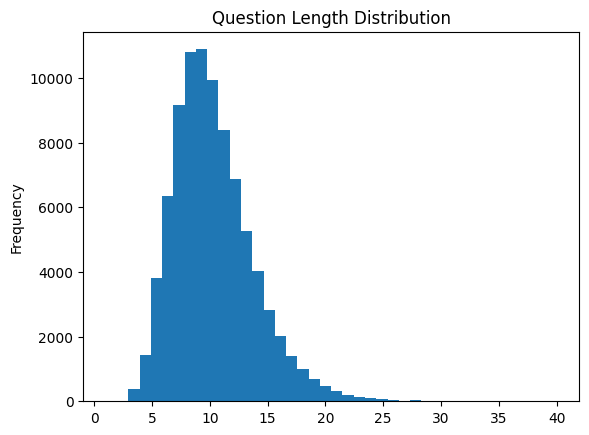

In [42]:
data['question_length'].plot(kind='hist', bins=40, title="Question Length Distribution")
plt.show()

# Answer Sentence Length

In [45]:
data['ans_sent_length'] = data['ans_sent'].apply(lambda x: len(x.split()))

In [46]:
data['ans_sent_length'].value_counts()

23     3235
21     3213
24     3110
20     3089
18     3070
       ... 
131       2
128       2
1         2
180       2
134       1
Name: ans_sent_length, Length: 134, dtype: int64

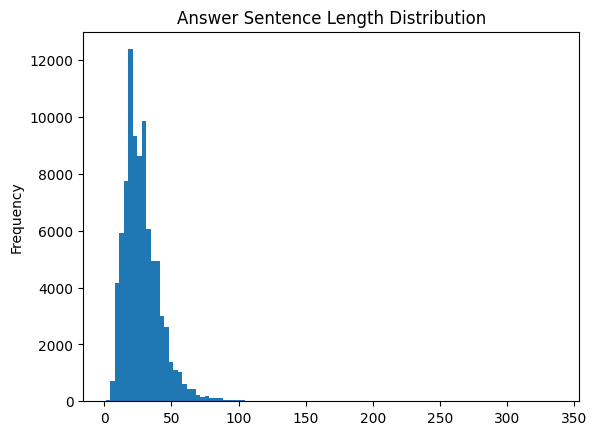

In [48]:
data['ans_sent_length'].plot(kind='hist', bins=100, title="Answer Sentence Length Distribution")
plt.show()

In [53]:
data[data['ans_sent_length'] == 1]

,question,ans_sent,answer_text,question_type,answer_pos_tag,answer_ner_tag,answer_length,clue_pos_tag,clue_ner_tag,clue_answer_dep_path_len,clue_length,clue_chunk,clue_text,question_length,ans_sent_length
25329,"when was mr. fingers' ""can you feel it?"" relea...",(1986).,1986,"(When, 4)",CD,DATE,1,UNK,UNK,-1,0,None,,9,1
34839,Who reported that Nintendo sold 7 million NES ...,Compute!,Compute!,"(Who, 1)",UNK,UNK,1,UNK,UNK,-1,0,None,,9,1


In [60]:
len(data[data['ans_sent_length'] <= 5])

138

# Original Squad Dataset EDA

https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1174/reports/2762006.pdf
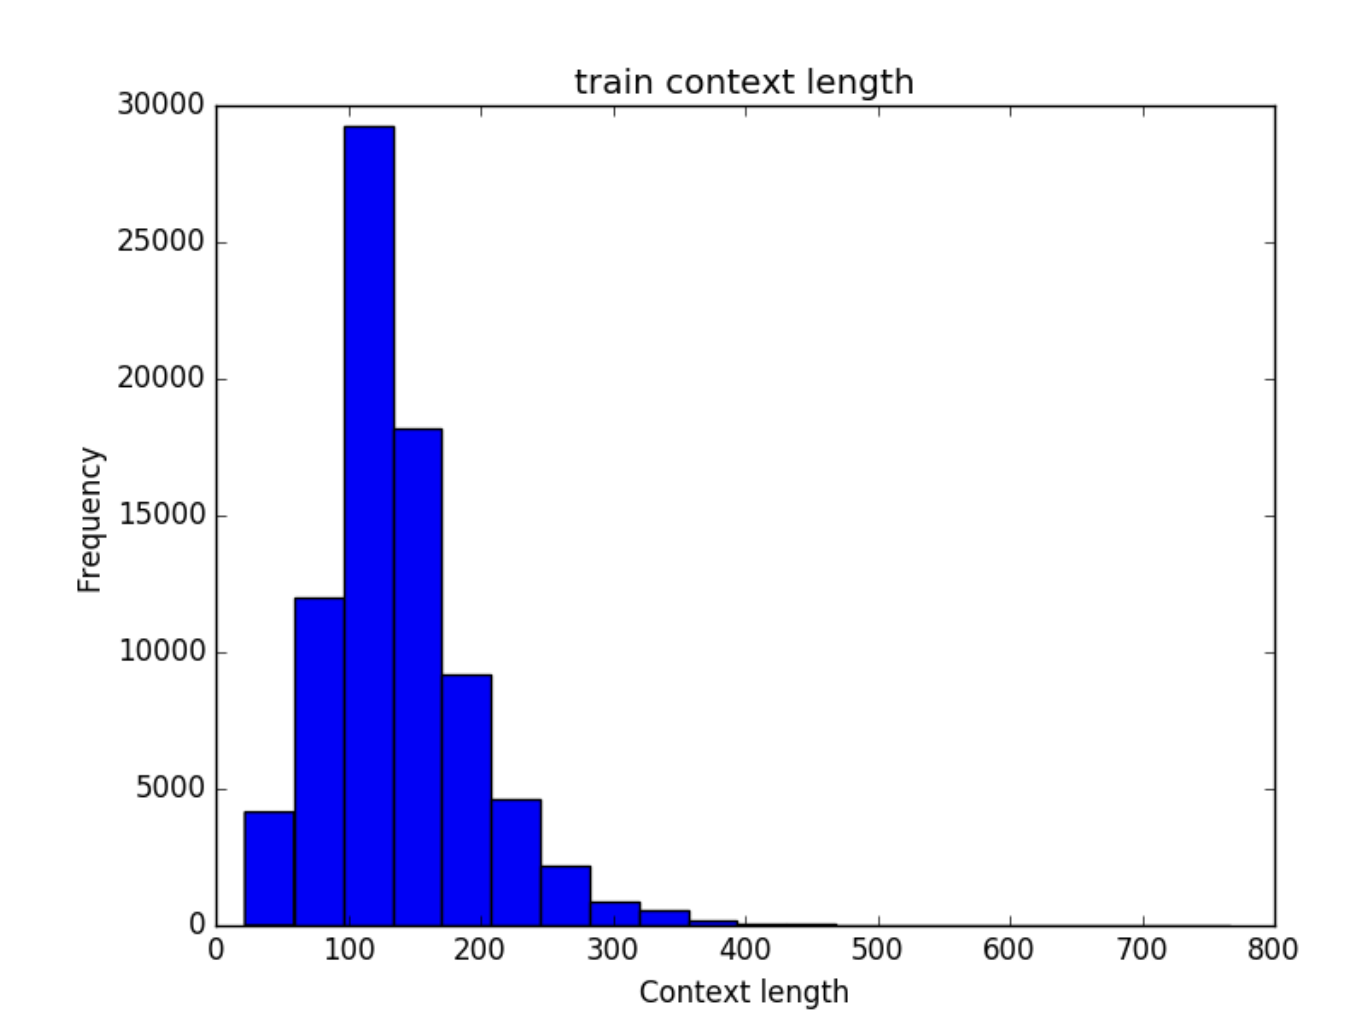

https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1194/reports/default/15848195.pdf

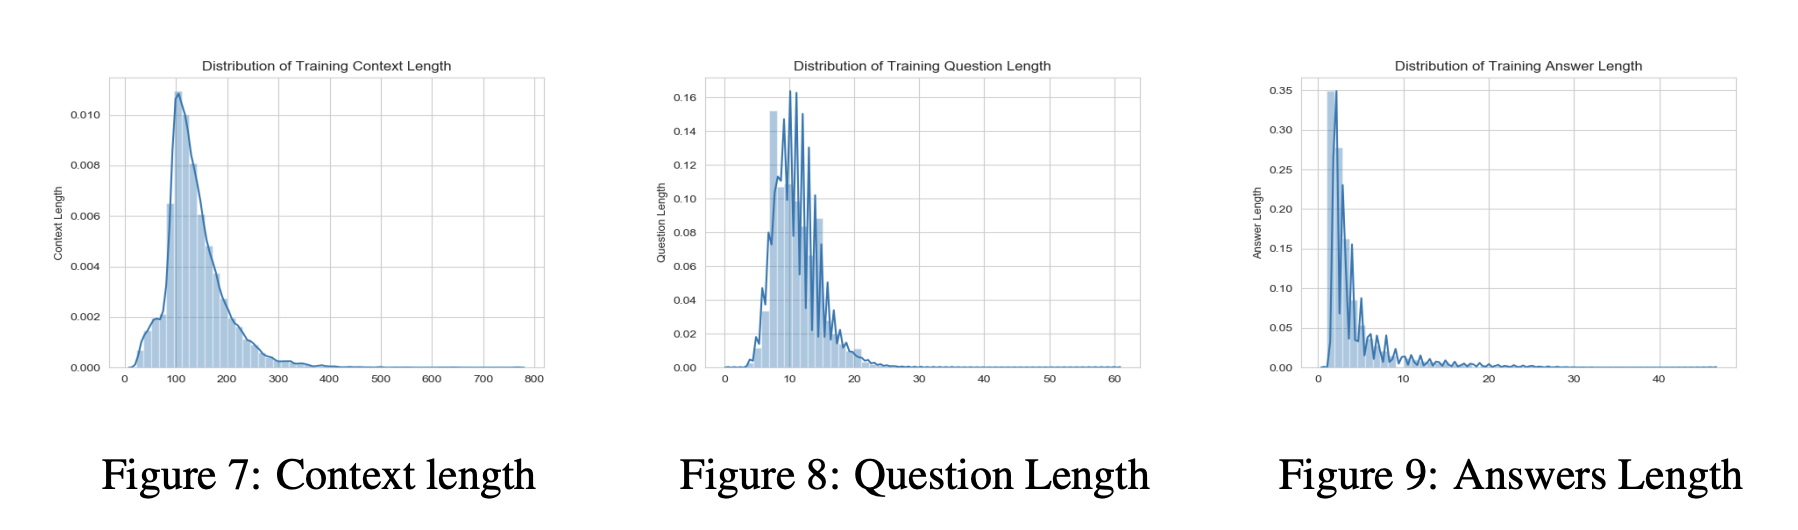

# Misc

In [2]:
import codecs
with codecs.open("/scratch/scratch8/madhurjindal/ACS-QG-Scratch/Datasets/original/SQuAD1.1-Zhou/dev.txt", encoding="utf-8") as fh:
        lines = fh.readlines()

In [4]:
line = lines[0]

In [6]:
fields = line.strip().split("\t")
ans_sent = fields[6]
answer_text = fields[8]
question = fields[9]

In [7]:
fields

['His armies quickly took Heisui , Ganzhou , and Suzhou -LRB- not the Suzhou in Jiangsu province -RRB- , and in the autumn he took Xiliang-fu -LSB- disambiguation needed -RSB- .',
 '22 22',
 '(ROOT (S (S (NP (PRP$ His) (NNS armies)) (ADVP (RB quickly)) (VP (VBD took) (NP (NNP Heisui) (, ,) (NNP Ganzhou) (, ,) (CC and) (NNP Suzhou)) (PRN (-LRB- -LRB-) (NP (NP (RB not) (DT the) (NNP Suzhou)) (PP (IN in) (NP (NNP Jiangsu) (NN province)))) (-RRB- -RRB-)))) (, ,) (CC and) (S (PP (IN in) (NP (DT the) (NN autumn))) (NP (PRP he)) (VP (VBD took) (SBAR (S (NP (NNP Xiliang-fu) (NNP -LSB-) (NN disambiguation)) (VP (VBD needed) (NP (NNS -RSB-))))))) (. .)))',
 'PRP$ NNS RB VBD NNP , NNP , CC NNP -LRB- RB DT NNP IN NNP NN -RRB- , CC IN DT NN PRP VBD NN -LRB- NN VBN -RRB- .',
 'O O O O PERSON O LOCATION O O LOCATION O O O LOCATION O LOCATION O O O O O O O O O MISC O O O O O',
 'What season was it when Genghis Khan took Xiliang-fu from the Tanguts ?',
 'His armies quickly took Heisui, Ganzhou, and Suz

In [8]:
answer_text

'autumn'

In [10]:
ans_sent

'His armies quickly took Heisui, Ganzhou, and Suzhou (not the Suzhou in Jiangsu province), and in the autumn he took Xiliang-fu[disambiguation needed].'